# Exploratory Data Analisys

It’s what you do when you first encounter a data set. But it’s not a once off process.

When exploring our dataset and its features, we have many options available to us. We can explore each feature individually, or compare pairs of features, finding the correlation between. Let's start with some simple Univariate (one feature) analysis.

Features can be of multiple types:

+ Nominal: is for mutual exclusive, but not ordered, categories. (Gender: Male/Female)
+ Ordinal: is one where the order matters but not the difference between values.
+ Interval: is a measurement where the difference between two values is meaningful.
+ Ratio: has all the properties of an interval variable, and also has a clear definition of 0.0.
[comment]: <> (https://www.quora.com/What-is-the-difference-between-interval-and-ratio-as-scale-of-measurement)
<img style="float: center;" src='images/variables.jpg' width="500" height="600"> 



There are multiple ways of manipulating each feature type, but for simplicity, we'll define only two feature types:

+ Numerical: any feature that contains numeric values.
+ Categorical: any feature that contains categories, or text

# The Titanic Dataset
## Some Background Information
The sinking of the RMS Titanic in the early morning of 15 April 1912, four days into the ship's maiden voyage from Southampton to New York City, was one of the deadliest peacetime maritime disasters in history, killing more than 1,500 people. The largest passenger liner in service at the time, Titanic had an estimated 2,224 people on board when she struck an iceberg in the North Atlantic. The ship had received six warnings of sea ice but was travelling at near maximum speed when the lookouts sighted the iceberg. Unable to turn quickly enough, the ship suffered a glancing blow that buckled the starboard (right) side and opened five of sixteen compartments to the sea. The disaster caused widespread outrage over the lack of lifeboats, lax regulations, and the unequal treatment of the three passenger classes during the evacuation. Inquiries recommended sweeping changes to maritime regulations, leading to the International Convention for the Safety of Life at Sea (1914), which continues to govern maritime safety.

<img style="float: center;" src='images/titanic.jpg' width="500" height="600">  

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for visualization
%matplotlib inline 
#for visualization in notebook

## Cheatsheets
http://www.utc.fr/~jlaforet/Suppl/python-cheatsheets.pdf

In [120]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [99]:
# Column names
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [100]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
# df_test.head()

<img style="float: center;" src='images/description.png' width="500" height="600">

In [102]:
# Information about the data set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<img style="float: center;" src='images/variables.png' width="500" height="600"> 

## Selection, Index

In [103]:
# selecting data by row number
df_train.iloc[3]

PassengerId                                               4
Survived                                                  1
Pclass                                                    1
Name           Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                                  female
Age                                                      35
SibSp                                                     1
Parch                                                     0
Ticket                                               113803
Fare                                                   53.1
Cabin                                                  C123
Embarked                                                  S
Name: 3, dtype: object

In [104]:
# selecting data by row range
df_train.iloc[0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
# 1st, 4th, 7th, 25th row + 1st 6th 7th columns.
df_train.iloc[[0,3,6,24], [0,5,6]]

,PassengerId,Age,SibSp
0,1,22.0,1
3,4,35.0,1
6,7,54.0,0
24,25,8.0,3


In [ ]:
df_train.set_index('Name', inplace=True)

In [110]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
df_train.loc["Braund, Mr. Owen Harris"]

PassengerId            1
Survived               0
Pclass                 3
Sex                 male
Age                   22
SibSp                  1
Parch                  0
Ticket         A/5 21171
Fare                7.25
Cabin                NaN
Embarked               S
Name: Braund, Mr. Owen Harris, dtype: object

In [137]:
df_train = pd.read_csv("data/train.csv")

## Description of data

In [18]:
# get discriptive statistics on "number" datatypes
# df_train.describe(include = ['number'])
df_train.describe(include = ['float64','int64'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
# get discriptive statistics on "objects" datatypes
df_train.describe(include = ['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kelly, Miss. Mary",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


We create a function to get a new dataframe where we will store, the type of data, the null values and the unique values.

In [140]:
def get_stats(df_train):
    # para guardar el tipo de dato de cada columna
    Data_dict = pd.DataFrame(df_train.dtypes)
    #renombramos la columna
    Data_dict = Data_dict.rename(columns = {0:'DataType'})
    #para guardar el numero de valores nulos
    Data_dict['MissingVal'] = df_train.isnull().sum()
    #para guardar el numero de valores unicos
    Data_dict['UniqueVal'] = df_train.nunique()
    #para guardar el conteo
    Data_dict['Count'] = df_train.count()
    return Data_dict

In [142]:
Data_dict =get_stats(df_train)
Data_dict

,DataType,MissingVal,UniqueVal,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


# Filter Data

In [83]:
# Show passengers over 18
adultUsers = df_train[df_train.Age > 18]
adultUsers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,Fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4.0,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4.0,1.0


In [114]:
# Show teenagers
teens = df_train[(df_train.Age >= 13) & (df_train.Age<20)]
teens.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S


## Univariate Analysis

In [33]:
# Number of passengers in each class
df_train.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

In [16]:
print("% of survivals") 
print("Pclass 1 : ", df_train.Survived[df_train.Pclass == 1].sum()/df_train[df_train.Pclass == 1].Survived.count())
print("Pclass 2 : ", df_train.Survived[df_train.Pclass == 2].sum()/df_train[df_train.Pclass == 2].Survived.count())
print("Pclass 3 : ", df_train.Survived[df_train.Pclass == 3].sum()/df_train[df_train.Pclass == 3].Survived.count())

% of survivals
Pclass 1 :  0.6296296296296297
Pclass 2 :  0.47282608695652173
Pclass 3 :  0.24236252545824846


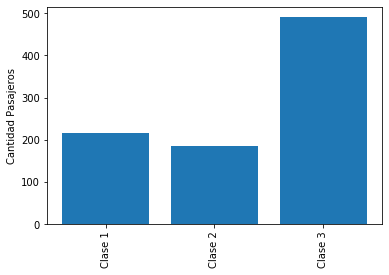

In [34]:
fig = plt.figure()
conteo = df_train.groupby('Pclass')['Pclass'].count()
plt.bar(conteo.index,conteo.values)
plt.ylabel('Cantidad Pasajeros')
plt.xticks(conteo.index, ["Clase 1","Clase 2","Clase 3"], rotation='vertical')
plt.savefig("graficos/pasajeros_clase.png")

([<matplotlib.axis.XTick at 0x7f0a1d9468d0>,
 <a list of 3 Text xticklabel objects>)

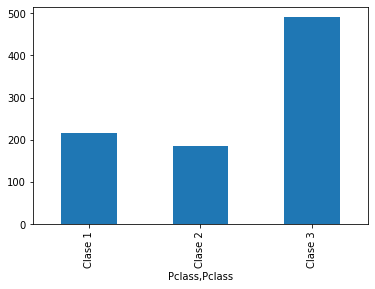

In [35]:
df_train.groupby('Pclass')['Pclass'].value_counts().plot.bar()
plt.xticks([0,1,2], ["Clase 1","Clase 2","Clase 3"], rotation='vertical')

## Pivoting

A pivot table is a table that summarizes data in another table, and is made by applying an operation such as sorting, averaging, or summing to data in the first table, typically including grouping of the data.

In [6]:
# Number of passengers who survived in each class grouped by sex. Also total was found for each class grouped by sex.
#use pivot_table when data is in dataframe
df_train.pivot_table('Survived', 'Sex', 'Pclass', aggfunc=np.sum, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,91,70,72,233
male,45,17,47,109
All,136,87,119,342


In [12]:
#use crosstab when data is not in a dataframe
pd.crosstab(df_train.Pclass,df_train.Sex,df_train.Survived,aggfunc=np.sum, margins=True).T

Pclass,1,2,3,All
Sex,,,,
female,91,70,72,233
male,45,17,47,109
All,136,87,119,342


In [36]:
# Number of men and women in each of the passenger class
conteo_sexo = df_train.groupby(['Sex', 'Pclass'])['Sex'].count()

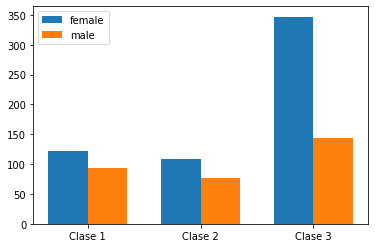

In [37]:
fig, ax = plt.subplots()
width = 0.35 
rects1 = ax.bar(conteo_sexo.index.levels[1] - width/2, conteo_sexo.values[3:], width, yerr=[0,0,0],
                label=conteo_sexo.index.levels[0][0])
rects2 = ax.bar(conteo_sexo.index.levels[1] + width/2, conteo_sexo.values[0:3], width, yerr=[0,0,0],
                label=conteo_sexo.index.levels[0][1])
ax.set_xticks(conteo_sexo.index.levels[1])
ax.set_xticklabels(('Clase 1', 'Clase 2', 'Clase 3'))
plt.legend()
plt.savefig("graficos/pasajeros_clase_sexo.png")

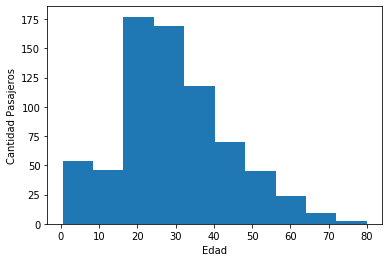

In [116]:
# plt.hist(df_train['Age'])
plt.hist(df_train['Age'].dropna())
plt.ylabel('Cantidad Pasajeros')
plt.xlabel('Edad')
plt.savefig("graficos/pasajeros_clase_sexo.png")

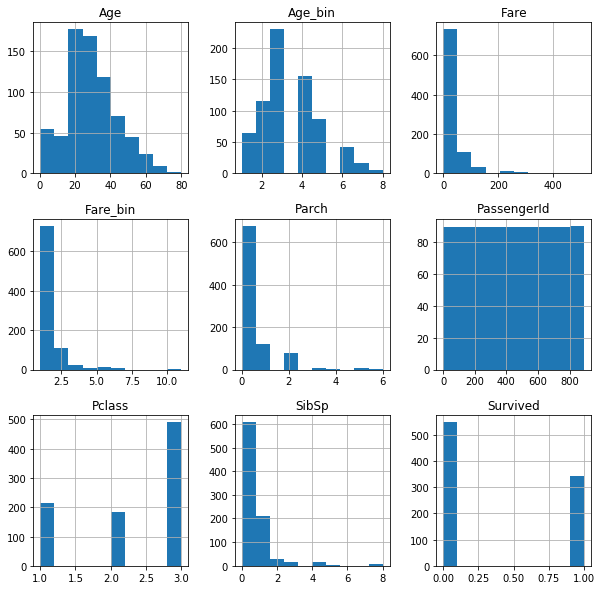

In [77]:
df_train.hist(figsize=(10, 10))
plt.show()

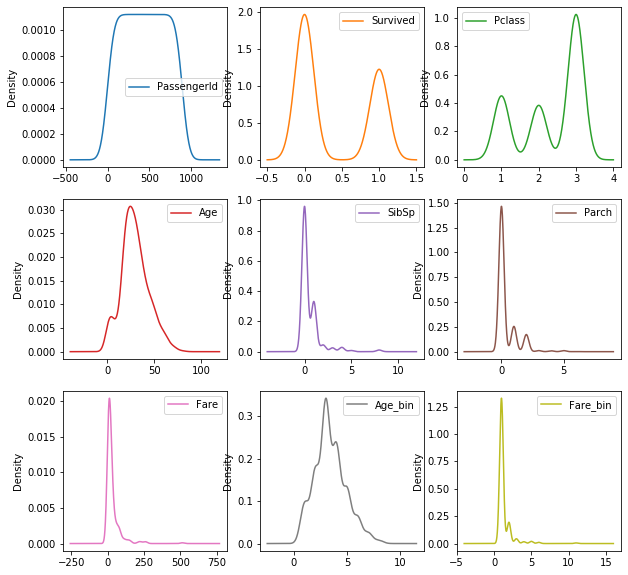

In [78]:
df_train.plot(kind='density', subplots=True, layout=(3,3), sharex=False,figsize=(10, 10))
plt.show()

## Correlation Matrix
Feature Correlation
Correlation is a measure of how much two random variables change together. Features should be uncorrelated with each other and highly correlated to the feature we’re trying to predict.


In [44]:
def plotting_corr( train , size = 10,title= 'Titanic Dataset Correlation'):
    #metodo del pandas
    corr = train.corr()
    fig , ax = plt.subplots(figsize = (size,size))
    cax = ax.matshow(corr)
    fig.colorbar(cax, fraction=0.046, pad=0.04)
    plt.title(title , fontsize=28)
    plt.xticks(range(len(corr.columns)) , corr.columns);
    plt.yticks(range(len(corr.columns)) , corr.columns);

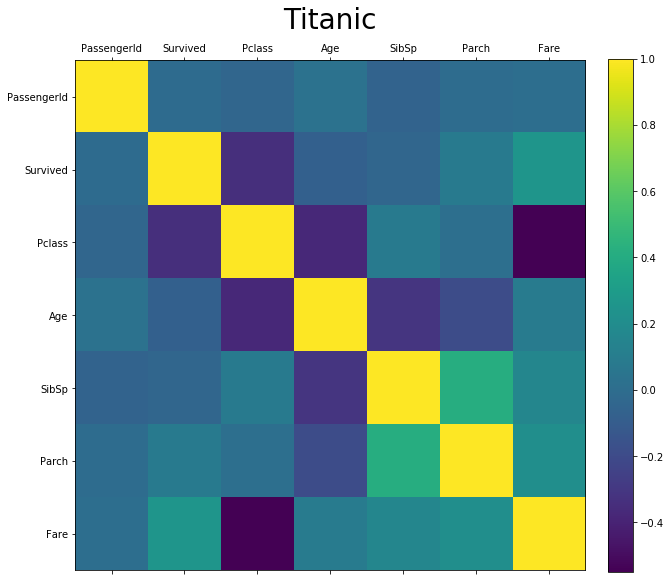

In [45]:
plotting_corr(df_train , size = 10,title='Titanic')

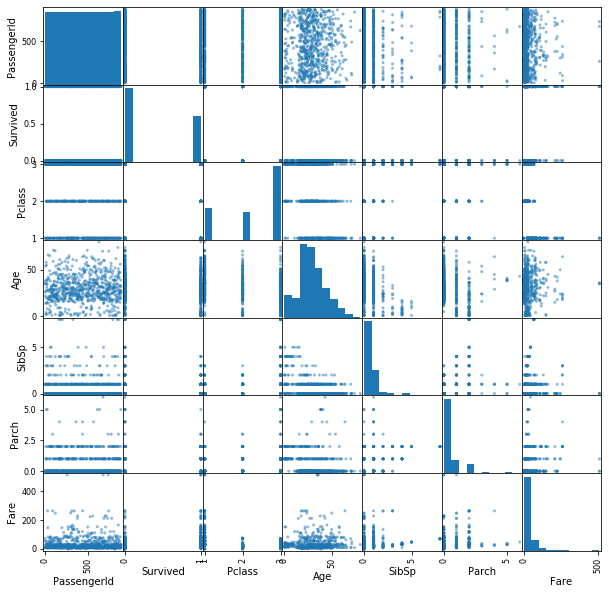

In [118]:
pd.plotting.scatter_matrix(df_train, figsize=(10, 10))
plt.show()

There is a positive correlation between Fare and Survived and negative correlation between Pclass and Survived, Fare and Pclass , Age and Pclass

In [117]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


# Feature Cleaning and Engineering
## Cleaning: To clean our data, we'll need to work with:

+ Missing values: Either omit elements from a dataset that contain missing values or impute them (fill them in).
+ Special values: Numeric variables are endowed with several formalized special values including ±Inf, NA and NaN. Calculations involving special values often result in special values, and need to be handled/cleaned.
+ Outliers: They should be detected, but not necessarily removed. Their inclusion in the analysis is a statistical decision.
+ Obvious inconsistencies: A person's age cannot be negative, a man cannot be pregnant and an under-aged person cannot possess a drivers license. Find the inconsistencies and plan for them.

## Engineering: There are multiple techniques for feature engineering:

* Decompose: Converting 2014-09-20T20:45:40Z into categorical attributes like hour_of_the_day, part_of_day, etc.
* Discretization: We can choose to either discretize some of the continuous variables we have, as some algorithms will perform faster. 
* Reframe Numerical Quantities: Changing from grams to kg, and losing detail might be both wanted and efficient for calculation.
* Feature Crossing: Creating new features as a combination of existing features. Could be multiplying numerical features, or combining categorical variables. This is a great way to add domain expertise knowledge to the dataset.



In [152]:
#we create a copy of the data
df_train_ml = df_train.copy()
df_test_ml = df_test.copy()

## Cleaning
we look drop the missing values of the column embarked

In [148]:
Data_dict = get_stats(df_train_ml)
Data_dict

,DataType,MissingVal,UniqueVal,Count
PassengerId,int64,0,889,889
Survived,int64,0,2,889
Pclass,int64,0,3,889
Name,object,0,889,889
Sex,object,0,2,889
Age,float64,177,88,712
SibSp,int64,0,7,889
Parch,int64,0,7,889
Ticket,object,0,680,889
Fare,float64,0,247,889


In [147]:
# as we have 2 NaN in Embarked, we apply drop to them
df_train_ml=df_train_ml.dropna(subset=['Embarked'])

## Engineering
We agroup the values of the ages in bins

In [155]:
# agrupamos los valores de las edades en 
df_train_ml['Age_bin']=np.nan
for i in range(8,0,-1):
    df_train_ml.loc[ df['Age'] <= i*10, 'Age_bin'] = i

In [64]:
len(df_train_ml)

891

In [65]:
df_train_ml.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_bin'],
      dtype='object')

In [52]:
df_train_ml['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [161]:
#Convert categorical variable into dummy/indicator variables.
df_train_ml = pd.get_dummies(df_train_ml, columns=['Sex', 'Embarked', 'Pclass'])
#we drop the columns that dont be useful
df_train_ml.drop(['PassengerId','Name','Ticket', 'Cabin','Age'],axis=1,inplace=True)
#drop nan values
df_train_ml.dropna(inplace=True)

In [162]:
df_train_ml.columns

Index(['Survived', 'SibSp', 'Parch', 'Fare', 'Age_bin', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1',
       'Pclass_2', 'Pclass_3'],
      dtype='object')

In [163]:
df_train_ml['Sex_male'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex_male, dtype: uint8

In [44]:
len(df_train_ml)

714

References
* https://github.com/7saheelahmed/Titanic-EDA/blob/master/Notebook/TITANIC%20EDA.ipynb
* https://www.datacamp.com/community/tutorials/kaggle-machine-learning-eda